In [1]:
%pip install yfinance tensorflow matplotlib scikit-learn ta

[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open     Volume  \
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL   
Date                                                                           
2015-01-22  25.003351  28.100000  28.117500  27.430000  27.565001  215185600   
2015-01-23  25.132378  28.245001  28.437500  27.882500  28.075001  185859200   
2015-01-26  25.159067  28.275000  28.590000  28.200001  28.434999  222460000   
2015-01-27  24.278164  27.285000  28.120001  27.257500  28.105000  382274800   
2015-01-28  25.650677  28.827499  29.530001  28.827499  29.407499  585908400   

Price         Return        RSI        EMA  
Ticker                                      
Date                                        
2015-01-22  0.026015  60.986439  24.313969  
2015-01-23  0.005160  62.490214  24.423090  
2015-01-26  0.001062  62.809549  24.521220  
2015-01-27 -0.035013  48.218490  24.488813  
2015-01-28  0.056533  62.741566  24.643728  

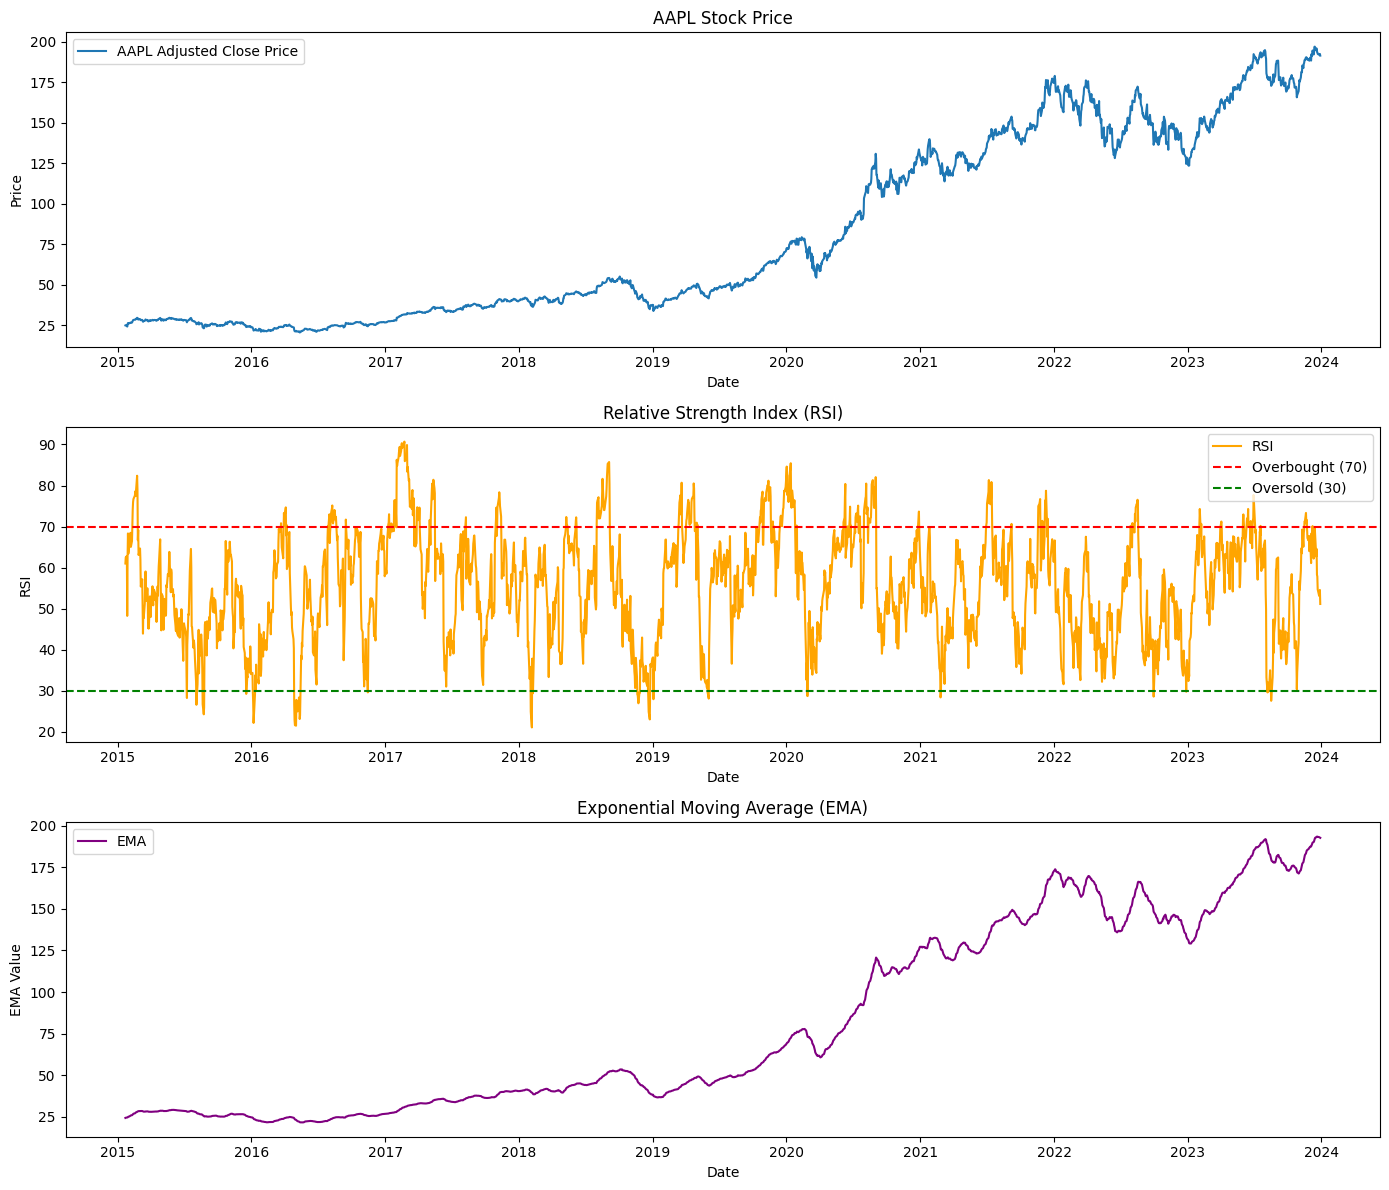

In [17]:
import yfinance as yf
import ta
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load the Stock Data
def load_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date,auto_adjust=False)
    data['Return'] = data['Adj Close'].pct_change()
    
    data['RSI'] = ta.momentum.RSIIndicator(data['Adj Close'].squeeze()).rsi()
    data['EMA'] = ta.trend.EMAIndicator(data['Adj Close'].squeeze()).ema_indicator()
    data.dropna(inplace=True)
    return data

# User Inputs
stock_symbol = "AAPL"
start_date = "2015-01-01"
end_date = "2023-12-31"

data = load_stock_data(stock_symbol, start_date, end_date)
print(data.head())

# Step 2: Plot the stock price, RSI, and EMA
plt.figure(figsize=(14, 12))

# Plot Adjusted Close Price
plt.subplot(3, 1, 1)
plt.plot(data['Adj Close'], label=f"{stock_symbol} Adjusted Close Price")
plt.title(f"{stock_symbol} Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Plot RSI
plt.subplot(3, 1, 2)
plt.plot(data['RSI'], label='RSI', color='orange')
plt.axhline(y=70, color='r', linestyle='--', label="Overbought (70)")
plt.axhline(y=30, color='g', linestyle='--', label="Oversold (30)")
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()

# Plot EMA
plt.subplot(3, 1, 3)
plt.plot(data['EMA'], label='EMA', color='purple')
plt.title("Exponential Moving Average (EMA)")
plt.xlabel("Date")
plt.ylabel("EMA Value")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

c:\Users\shubh\.conda\envs\stock\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 14, 50)         │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 14, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0484 - val_loss: 0.0047
Epoch 2/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 3/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 4/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 5/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 6/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 7/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 8/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 9/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0021 - val_loss: 0.0067
Epoch 10/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021 - val_loss: 9.9290e-04
Epoch 11/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017 - val_loss: 0.0037
Epoch 12/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss:

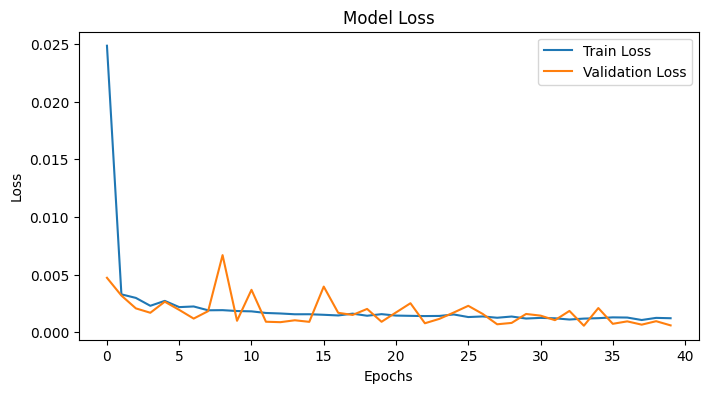

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


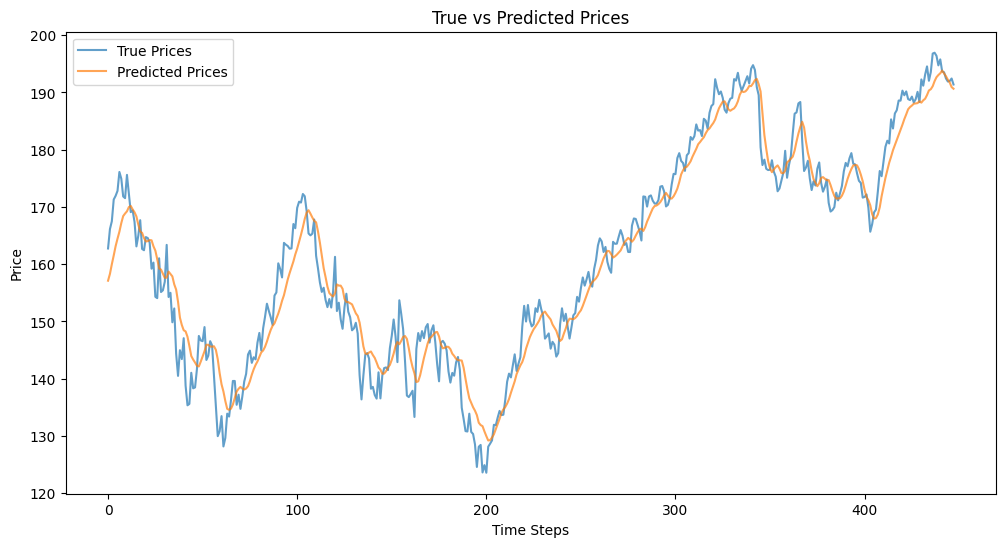

In [ ]:
# Step 3: Prepare the Dataset
features = ['Adj Close', 'Volume', 'RSI', 'EMA']
lookback =14  # Total number of days window choosen

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# Create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i, 0])  # Target is the first column: 'Adj Close'
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, lookback)

# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build the LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(lookback, len(features))),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 6: Evaluate the Model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plot Training History
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Rescale predictions and actual values
def rescale(data, predictions):
    dummy_features = np.zeros((len(predictions), len(features) - 1))
    rescaled = scaler.inverse_transform(np.concatenate([predictions, dummy_features], axis=1))
    return rescaled[:, 0]

y_pred_rescaled = rescale(data[features], y_pred)
y_test_rescaled = rescale(data[features], y_test.reshape(-1, 1))

# Plot Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="True Prices", alpha=0.7)
plt.plot(y_pred_rescaled, label="Predicted Prices", alpha=0.7)
plt.title("True vs Predicted Prices")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.legend()
plt.show()

In [19]:
model.save('lstm_stock_model.keras')
print("Model saved as lstm_stock_model - Apple stock price")

Model saved as lstm_stock_model - Apple stock price
